In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Mall_CS-key-cs.csv')

In [6]:
from sklearn.cluster import KMeans

In [8]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [11]:
sse = {}
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=101)
    kmeans.fit(X)
    sse[k] = kmeans.inertia_

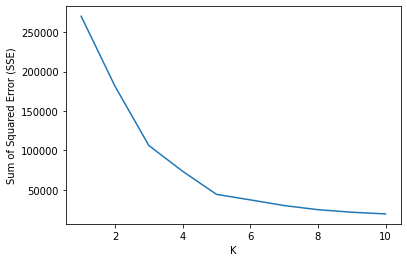

In [12]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error (SSE)')
plt.plot(list(sse.keys()), list(sse.values()))

In [13]:
#recommeneded k value is 3 or 5 with elbow method
#lets try with 5 

model = KMeans(n_clusters=5, random_state=42)

# model fitting
model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [14]:
# prediction 
y_pred = model.fit_predict(X)

In [15]:
df['cluster'] = y_pred
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
5,6,Female,22,17,76,3
6,7,Female,35,18,6,2
7,8,Female,23,18,94,3
8,9,Male,64,19,3,2
9,10,Female,30,19,72,3


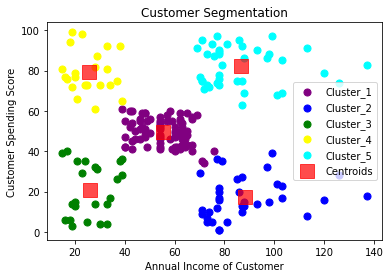

In [21]:
# cluster visualisation


plt.scatter(X[y_pred==0,0], X[y_pred==0,1], s=50, c='purple', label='Cluster_1')
plt.scatter(X[y_pred==1,0], X[y_pred==1,1], s=50, c='blue', label='Cluster_2')
plt.scatter(X[y_pred==2,0], X[y_pred==2,1], s=50, c='green', label='Cluster_3')
plt.scatter(X[y_pred==3,0], X[y_pred==3,1], s=50, c='yellow', label='Cluster_4')
plt.scatter(X[y_pred==4,0], X[y_pred==4,1], s=50, c='cyan', label='Cluster_5')

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=200, marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income of Customer')
plt.ylabel('Customer Spending Score')
plt.legend()
plt.show()

In [22]:
#save the model as pickle file
import pickle

pickle.dump(model, open("kmeans.pkl", "wb"))